Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### Reading the Data

### Importing all the important libraries

In [1]:
import pathlib
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#If you are using the data by mounting the google drive, use the following :
# from google.colab import drive
# drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [ ]:
!unzip "/content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment/CNN_assignment.zip" -d "/content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment/CNN_assignment"

Archive:  /content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment/CNN_assignment.zip
  inflating: /content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: /content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: /content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: /content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: /content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment/CNN_assignment/S

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment - Copy/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment - Copy/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
# x_train = np.array(train_ds)
# x_train

In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

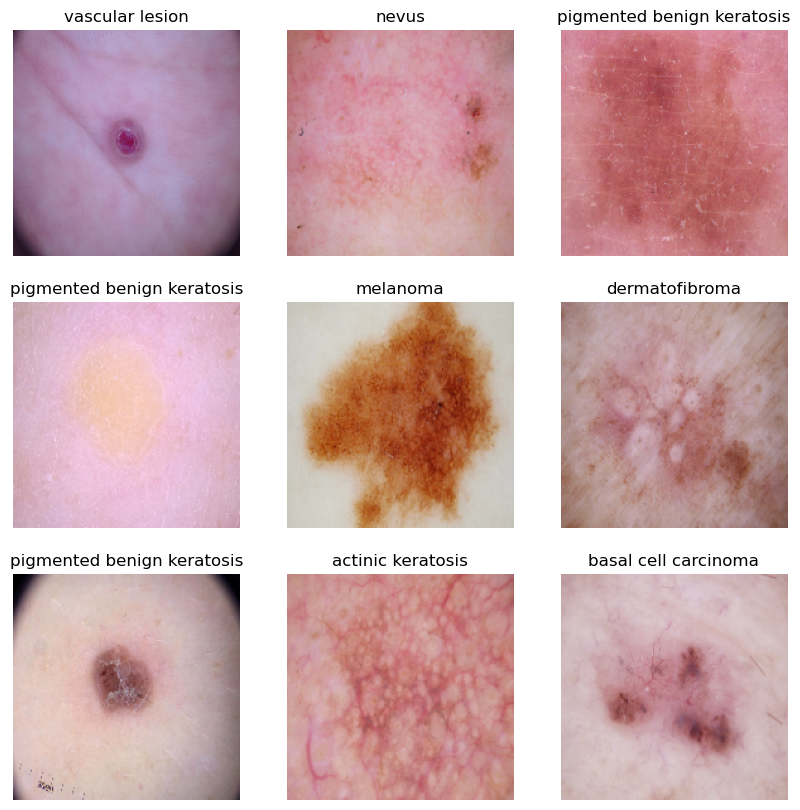

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
   # print(images[i].numpy().astype("uint8"))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model 1


In [ ]:
### Your code goes here
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer
model = Sequential()

#model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer
model.add(tf.keras.layers.Rescaling(1./255,input_shape=(180,180,3)))

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

### Train the model

In [ ]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 311ms/step - accuracy: 0.1966 - loss: 2.3098 - val_accuracy: 0.2617 - val_loss: 1.9642
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 303ms/step - accuracy: 0.2799 - loss: 1.8980 - val_accuracy: 0.3579 - val_loss: 1.7991
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 302ms/step - accuracy: 0.4111 - loss: 1.6591 - val_accuracy: 0.5168 - val_loss: 1.5059
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 285ms/step - accuracy: 0.4780 - loss: 1.5066 - val_accuracy: 0.4787 - val_loss: 1.4816
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 288ms/step - accuracy: 0.4843 - loss: 1.3989 - val_accuracy: 0.5145 - val_loss: 1.4426
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 283ms/step - accuracy: 0.5415 - loss: 1.3346 - val_accuracy: 0.5056 - val_loss: 1.4461
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 292ms/step - accuracy: 0.5786 - loss: 1.2559 - val_accuracy: 0.5302 - val_loss: 1.4783
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 283ms/step - accuracy: 0.5633 - loss: 1.2378 - val_accu

### Visualizing training results

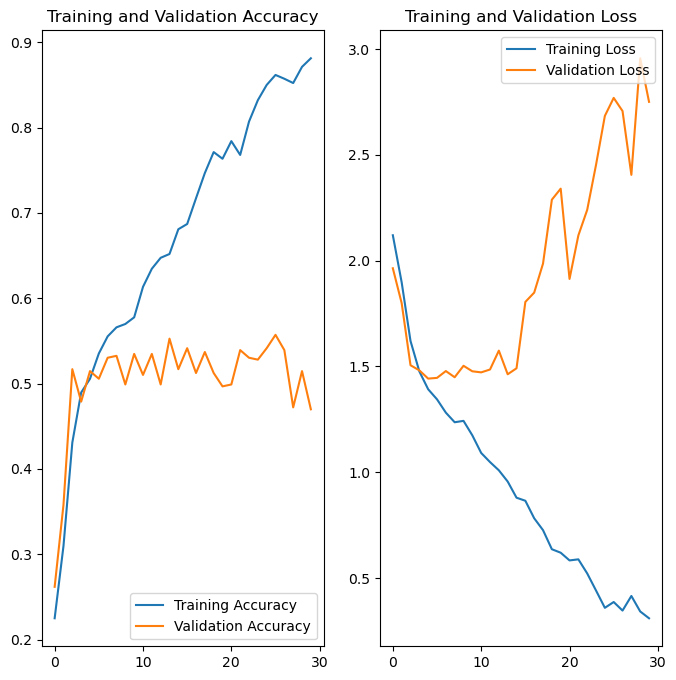

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

Findings:

- The model is overfitting because there is lot of difference between the training and validation accuracy and also there is considerable difference in loss functions in training and test

###  We will try to apply data augmentation methods and see if it can address the overfitting problem

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
data_augument = keras.Sequential([
                             layers.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.RandomRotation(0.2, fill_mode='reflect'),
                             layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect'),
                             layers.RandomTranslation(1,.5,fill_mode="reflect",interpolation="bilinear",seed=None,fill_value=0.0),
])



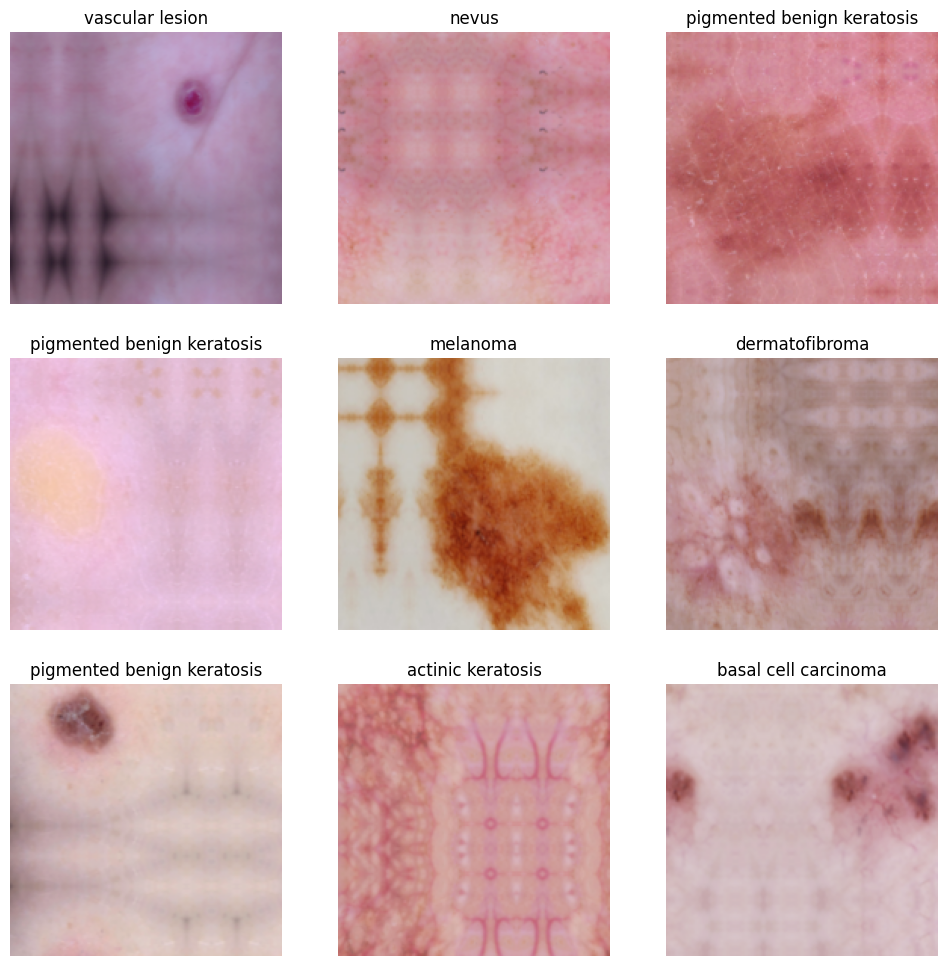

In [ ]:
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Model 2

In [ ]:
model= Sequential([
       data_augmentation,
       tf.keras.layers.Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)),
       # adding the first convolving layer
       layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='relu'),
       layers.MaxPooling2D(),
       #Adding the second convolving layer
       layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='relu'),
       layers.MaxPooling2D(),
       #Adding the third convolving layer
       layers.Conv2D(128,kernel_size=(3,3), padding='same', activation='relu'),
       layers.MaxPooling2D(),
       #Dropout layer with 50% Fraction of the input units to drop.
       layers.Dropout(0.5),
       #adding the Flatten layer
       layers.Flatten(),
       # adding Dense layer
       layers.Dense(128, activation='relu'),
       #Dropout layer with 25% Fraction of the input units to drop.
       layers.Dropout(0.25),
       layers.Dense(len(class_names))

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)      

### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs

epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 351s 6s/step - loss: 2.1271 - accuracy: 0.1987 - val_loss: 2.0438 - val_accuracy: 0.2148
Epoch 2/30
56/56 [==============================] - 18s 291ms/step - loss: 1.8921 - accuracy: 0.3220 - val_loss: 1.5821 - val_accuracy: 0.4899
Epoch 3/30
56/56 [==============================] - 20s 295ms/step - loss: 1.5736 - accuracy: 0.4392 - val_loss: 1.5242 - val_accuracy: 0.5034
Epoch 4/30
56/56 [==============================] - 19s 298ms/step - loss: 1.5105 - accuracy: 0.4794 - val_loss: 1.5034 - val_accuracy: 0.4765
Epoch 5/30
56/56 [==============================] - 20s 316ms/step - loss: 1.4195 - accuracy: 0.5073 - val_loss: 1.4004 - val_accuracy: 0.5280
Epoch 6/30
56/56 [==============================] - 18s 296ms/step - loss: 1.4182 - accuracy: 0.5000 - val_loss: 1.5454 - val_accuracy: 0.4765
Epoch 7/30
56/56 [==============================] - 20s 319ms/step - loss: 1.3635 - accuracy: 0.5240 - val_loss: 1.3672 - val_accuracy: 0.5235
E

### Visualizing the results

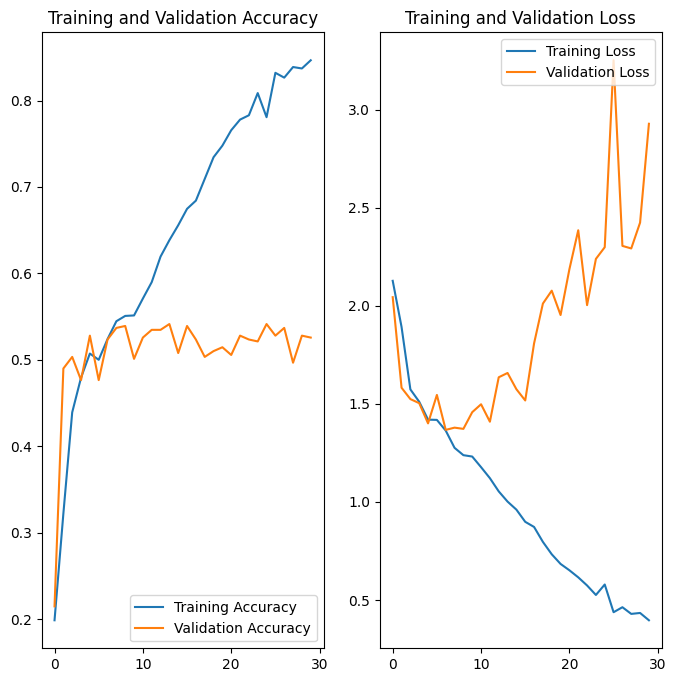

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Findings from second model:
- There is not much improvement in accuracy but the overfitting problem is still there after data augmentation

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [10]:
## Your code goes here.
path_list=[]
lesion_list=[]
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/Othercomputers/My Laptop/Melano...,actinic keratosis
1,/content/drive/Othercomputers/My Laptop/Melano...,actinic keratosis
2,/content/drive/Othercomputers/My Laptop/Melano...,actinic keratosis
3,/content/drive/Othercomputers/My Laptop/Melano...,actinic keratosis
4,/content/drive/Othercomputers/My Laptop/Melano...,actinic keratosis
...,...,...
2234,/content/drive/Othercomputers/My Laptop/Melano...,vascular lesion
2235,/content/drive/Othercomputers/My Laptop/Melano...,vascular lesion
2236,/content/drive/Othercomputers/My Laptop/Melano...,vascular lesion
2237,/content/drive/Othercomputers/My Laptop/Melano...,vascular lesion


In [11]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/Othercomputers/My Laptop/Melano...,actinic keratosis
1,/content/drive/Othercomputers/My Laptop/Melano...,actinic keratosis
2,/content/drive/Othercomputers/My Laptop/Melano...,actinic keratosis
3,/content/drive/Othercomputers/My Laptop/Melano...,actinic keratosis
4,/content/drive/Othercomputers/My Laptop/Melano...,actinic keratosis
...,...,...
2234,/content/drive/Othercomputers/My Laptop/Melano...,vascular lesion
2235,/content/drive/Othercomputers/My Laptop/Melano...,vascular lesion
2236,/content/drive/Othercomputers/My Laptop/Melano...,vascular lesion
2237,/content/drive/Othercomputers/My Laptop/Melano...,vascular lesion


<BarContainer object of 9 artists>

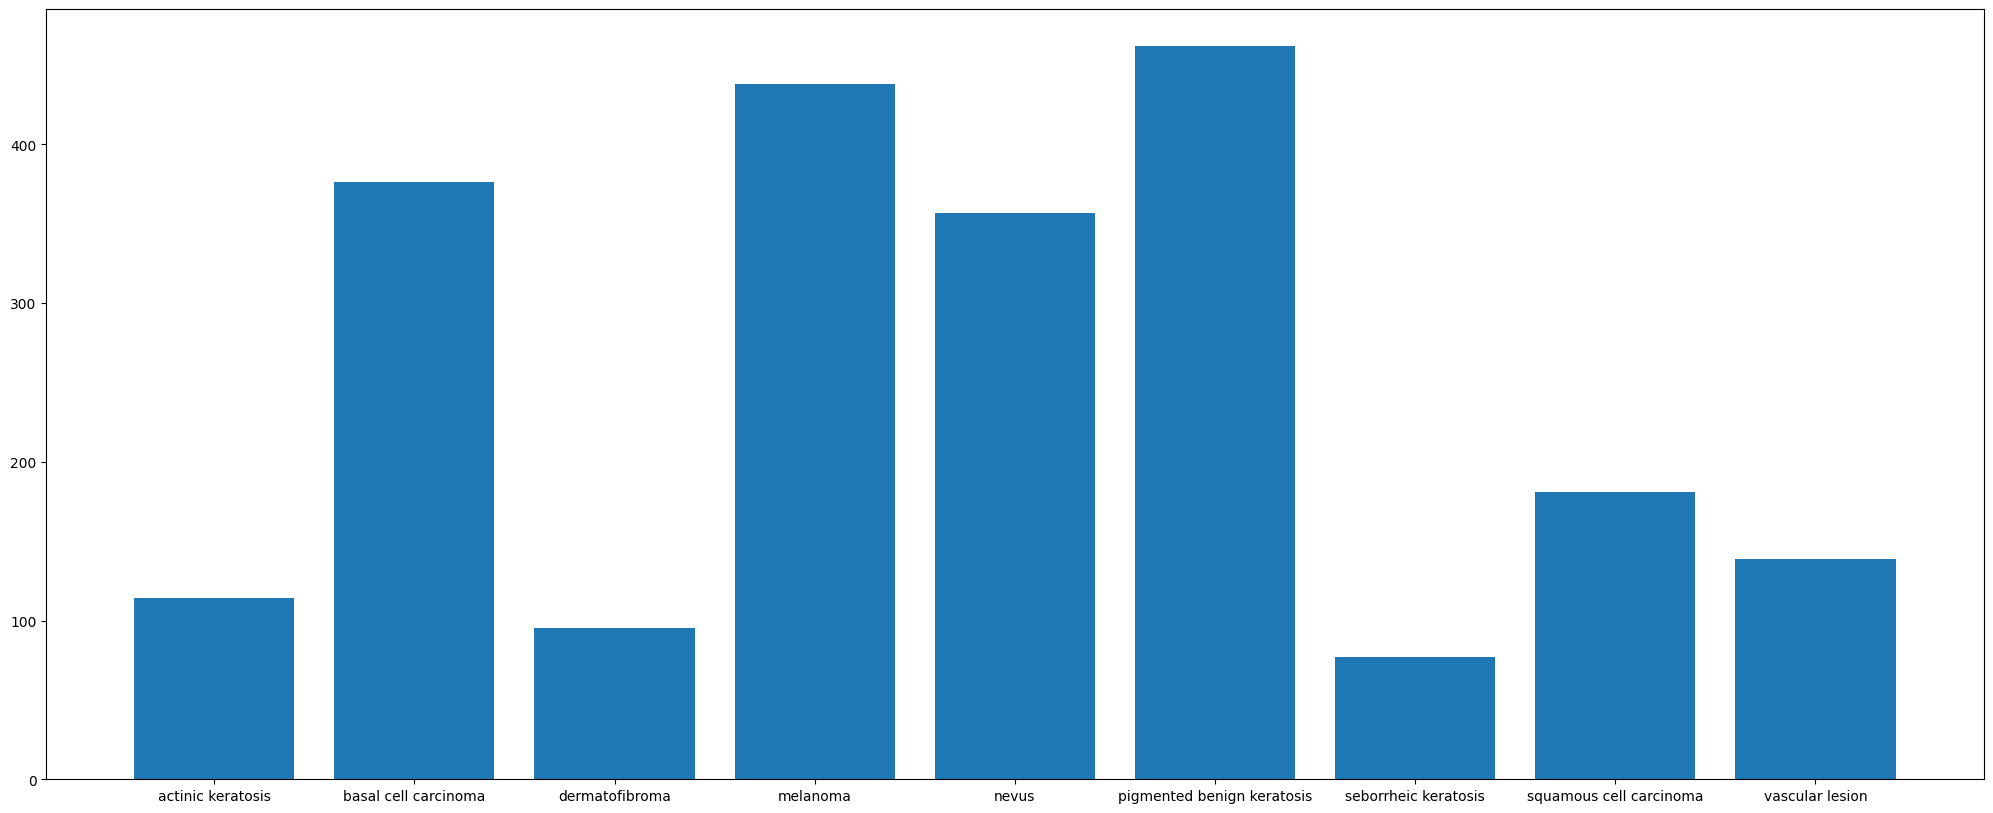

In [12]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
 Answer - Seborrheic keratosis has the least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
Answer - actinic keratosis and dermatofibroma have proportionate number of classes.
melanoma and pigmented benign keratosis have proprtionate number of classes

In [ ]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [9]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [17]:
#Update the paths of the train dataset
import Augmentor
import os
path_to_training_dataset="/content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment - Copy/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
for i in class_names:
    path = path_to_training_dataset + '/' + i
    p = Augmentor.Pipeline(path, save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
    p.flip_left_right(probability=0.4)
    p.flip_top_bottom(probability=0.8)
    p.sample(500)



Initialised with 114 image(s) found.
Output directory set to /content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment - Copy/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B1EF065BD90>: 100%|██████████| 500/500 [00:23<00:00, 21.72 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment - Copy/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B1F10726830>: 100%|██████████| 500/500 [00:21<00:00, 23.55 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment - Copy/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B1EF079A080>: 100%|██████████| 500/500 [00:22<00:00, 22.04 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment - Copy/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7B1EF069FD60>: 100%|██████████| 500/500 [01:53<00:00,  4.41 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment - Copy/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7B1EF050F3A0>: 100%|██████████| 500/500 [01:32<00:00,  5.41 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment - Copy/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B1EF052BD90>: 100%|██████████| 500/500 [00:20<00:00, 24.50 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment - Copy/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B1EF0658A60>: 100%|██████████| 500/500 [00:45<00:00, 10.98 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment - Copy/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B1EF0501D20>: 100%|██████████| 500/500 [00:19<00:00, 25.98 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment - Copy/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B1F10763B50>: 100%|██████████| 500/500 [00:21<00:00, 23.08 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [18]:
# image_count_train = len(list(data_dir_train.glob('*/output/*/*.jpg*')))
# print(image_count_train)
import glob
jpg_files = glob.glob(os.path.join(data_dir_train, "*/output/*.jpg"))
image_count_train = len(list(jpg_files))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [19]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment - Copy/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033705.jpg_34ffd758-2be6-4178-bc0e-c17b2865a209.jpg',
 '/content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment - Copy/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026626.jpg_eeea4a01-bd64-4f06-b935-1e62d6cc7ab2.jpg',
 '/content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment - Copy/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025780.jpg_6fd4ab32-f13f-4d4d-bd5e-13ff3e1571bd.jpg',
 '/content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment - Copy/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ou

In [21]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [22]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [24]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2.head()

,Path,Label
0,/content/drive/Othercomputers/My Laptop/Melano...,actinic keratosis
1,/content/drive/Othercomputers/My Laptop/Melano...,actinic keratosis
2,/content/drive/Othercomputers/My Laptop/Melano...,actinic keratosis
3,/content/drive/Othercomputers/My Laptop/Melano...,actinic keratosis
4,/content/drive/Othercomputers/My Laptop/Melano...,actinic keratosis


In [25]:
new_df = pd.concat([original_df,df2],ignore_index=True)

In [ ]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [26]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

#### **Todo:** Create a validation dataset

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [27]:
valds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Model 3

In [34]:
model= Sequential([
       tf.keras.layers.Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)),
       # adding the first convolving layer
       layers.Conv2D(32,kernel_size=(3,3),padding="same",activation='relu'),
       layers.MaxPooling2D(pool_size=(2,2)),

       # adding the second convolving layer
       layers.Conv2D(64,kernel_size=(3,3),padding="same",activation='relu'),
       layers.MaxPooling2D(pool_size=(2,2)),
       layers.Dropout(0.25),

       #Adding the third convolving layer
       layers.Conv2D(128,kernel_size=(3,3),padding="same",activation='relu'),
       layers.MaxPooling2D(pool_size=(2,2)),

       #Dropout layer with 50% Fraction of the input units to drop.
       layers.Dropout(0.5),

       #adding the Flatten layer
       layers.Flatten(),

       # adding Dense layer
       layers.Dense(128, activation='relu'),

       #Dropout layer with 25% Fraction of the input units to drop.
       layers.Dropout(0.25),
       layers.Dense(len(class_names))

])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 45, 45, 64)       

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [36]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=valds,
  epochs=epochs
)

Epoch 1/50
56/56 [==============================] - 24s 369ms/step - loss: 2.2458 - accuracy: 0.1830 - val_loss: 2.2135 - val_accuracy: 0.1411
Epoch 2/50
56/56 [==============================] - 25s 407ms/step - loss: 1.9841 - accuracy: 0.2411 - val_loss: 2.1066 - val_accuracy: 0.2220
Epoch 3/50
56/56 [==============================] - 26s 431ms/step - loss: 1.8355 - accuracy: 0.3298 - val_loss: 1.8583 - val_accuracy: 0.3148
Epoch 4/50
56/56 [==============================] - 24s 389ms/step - loss: 1.7001 - accuracy: 0.3878 - val_loss: 1.9290 - val_accuracy: 0.3244
Epoch 5/50
56/56 [==============================] - 24s 391ms/step - loss: 1.5646 - accuracy: 0.4581 - val_loss: 1.6511 - val_accuracy: 0.4053
Epoch 6/50
56/56 [==============================] - 24s 393ms/step - loss: 1.4539 - accuracy: 0.4877 - val_loss: 1.5713 - val_accuracy: 0.4306
Epoch 7/50
56/56 [==============================] - 24s 396ms/step - loss: 1.4026 - accuracy: 0.5106 - val_loss: 1.5657 - val_accuracy: 0.4209

#### **Todo:**  Visualize the model results

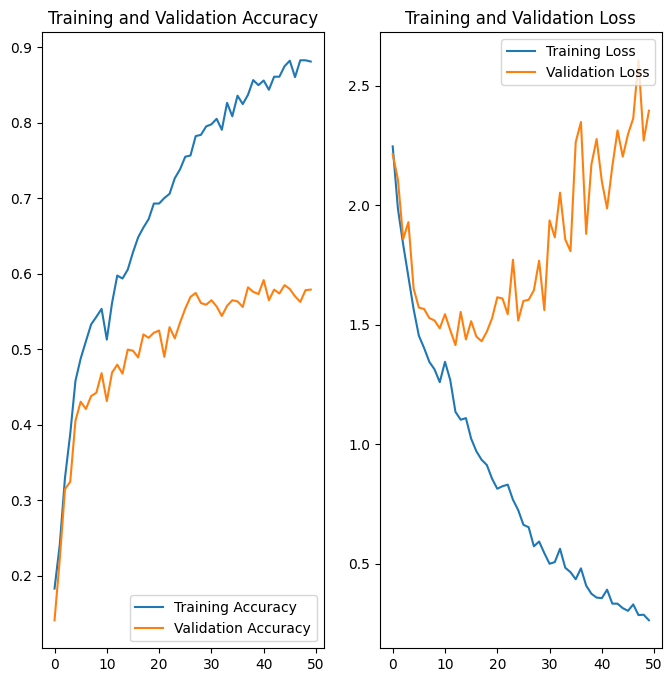

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

####  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

- Accuracy on training data has increased by using Augmentor library but validation accuracy is still low

- Model is still overfitting even after adding dropout layers

- The problem of overfitting can be solved by add more layer,neurons or adding more dropout layers or training on more sample data





**Model Prediction**

/content/drive/Othercomputers/My Laptop/MelanomaDetection_Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/dermatofibroma/*
1/1 [==============================] - 0s 23ms/step
Actual Class dermatofibroma
Predictive Class dermatofibroma


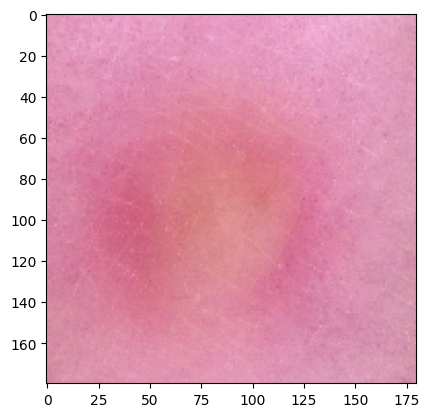

In [ ]:
from glob import glob
Test_image_path = os.path.join(data_dir_test, class_names[2], '*')
print(Test_image_path)
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-2],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[2] +'\n'+ "Predictive Class "+pred_class )